<a href="https://colab.research.google.com/github/KushalranaAI/Machine-learning-/blob/main/Project_2(Diabetes_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wrok flow for this project
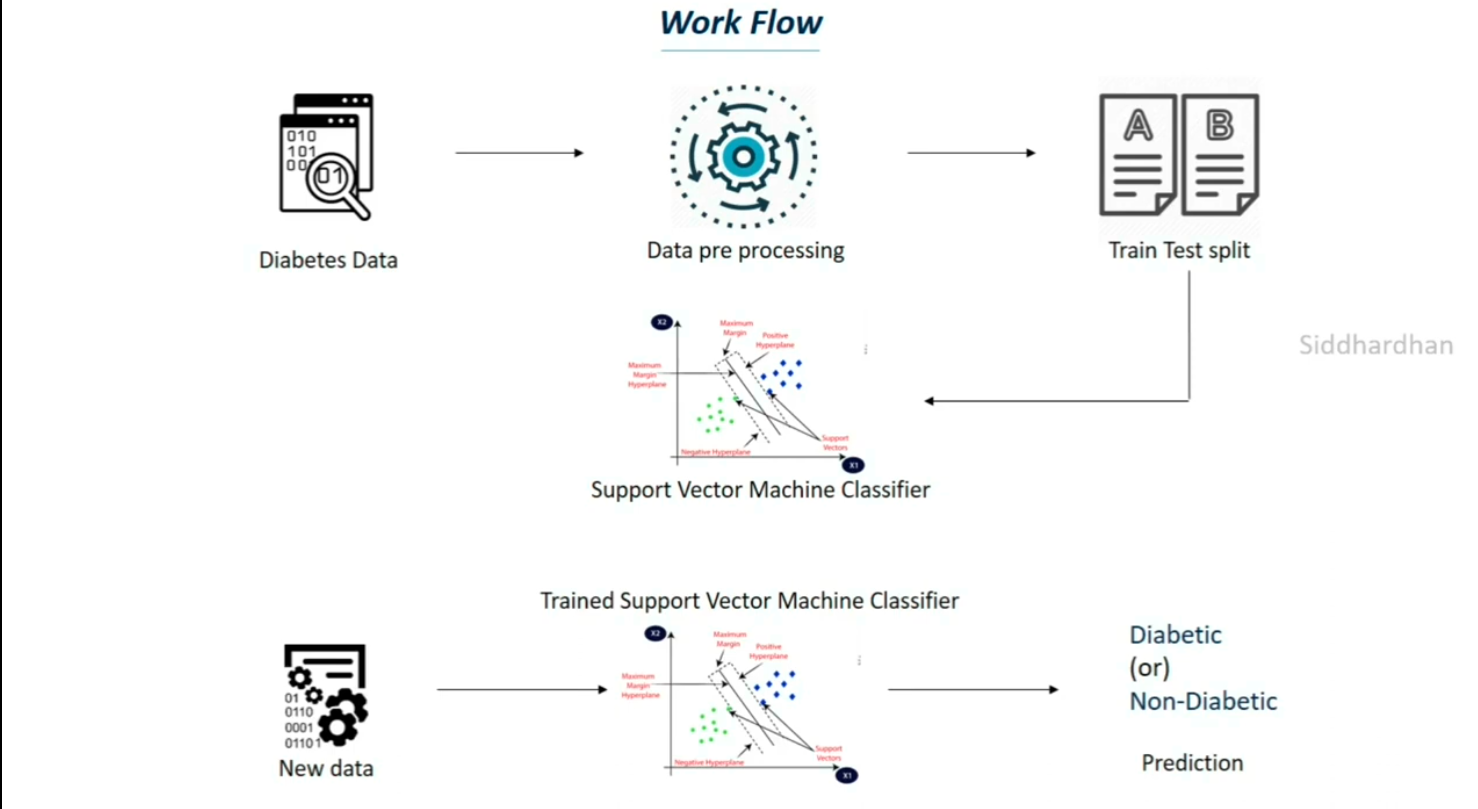

In [25]:
# Importing the dependencies

import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and Analysis

In [2]:
# loading a diabetes dataset to pandas dataframe 
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [3]:
# first 5 rows of diabetics dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
# getting the statistical feature of the  data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
 diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> non-diabetic

1 --> diabetic

In [8]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separate the data and label
X = diabetes_data.drop(columns='Outcome', axis =1)
Y = diabetes_data['Outcome']

Data Standardization

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X)

StandardScaler()

In [12]:
standardized_data = scaler.transform(X)

In [13]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
X = standardized_data


Train test split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2,stratify=Y)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training a model

In [18]:
classifier = svm.SVC(kernel='linear')

In [21]:
# training a support vector machine classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Module evaluation

In [27]:
# Accuracy score
# accuracy score for a training data
X_train_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)


In [28]:
print(training_data_accuracy)

0.7866449511400652


In [29]:
# accuracy score for a testing data
X_test_predict = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predict, Y_test)


In [30]:
print(testing_data_accuracy)

0.7727272727272727


Macking a predicting system

In [33]:
input_data= (2,197,70,45,543,30.5,0.158,53)
# change this data into numpy array for faster calculation
input_data_as_numpy_array = np.array(input_data)

# reshape the array as we are predicitng for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)

prediction = classifier.predict(input_data_reshaped)
print(prediction)


[1]
